In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_name_translation = pd.read_csv('product_category_name_translation.csv')

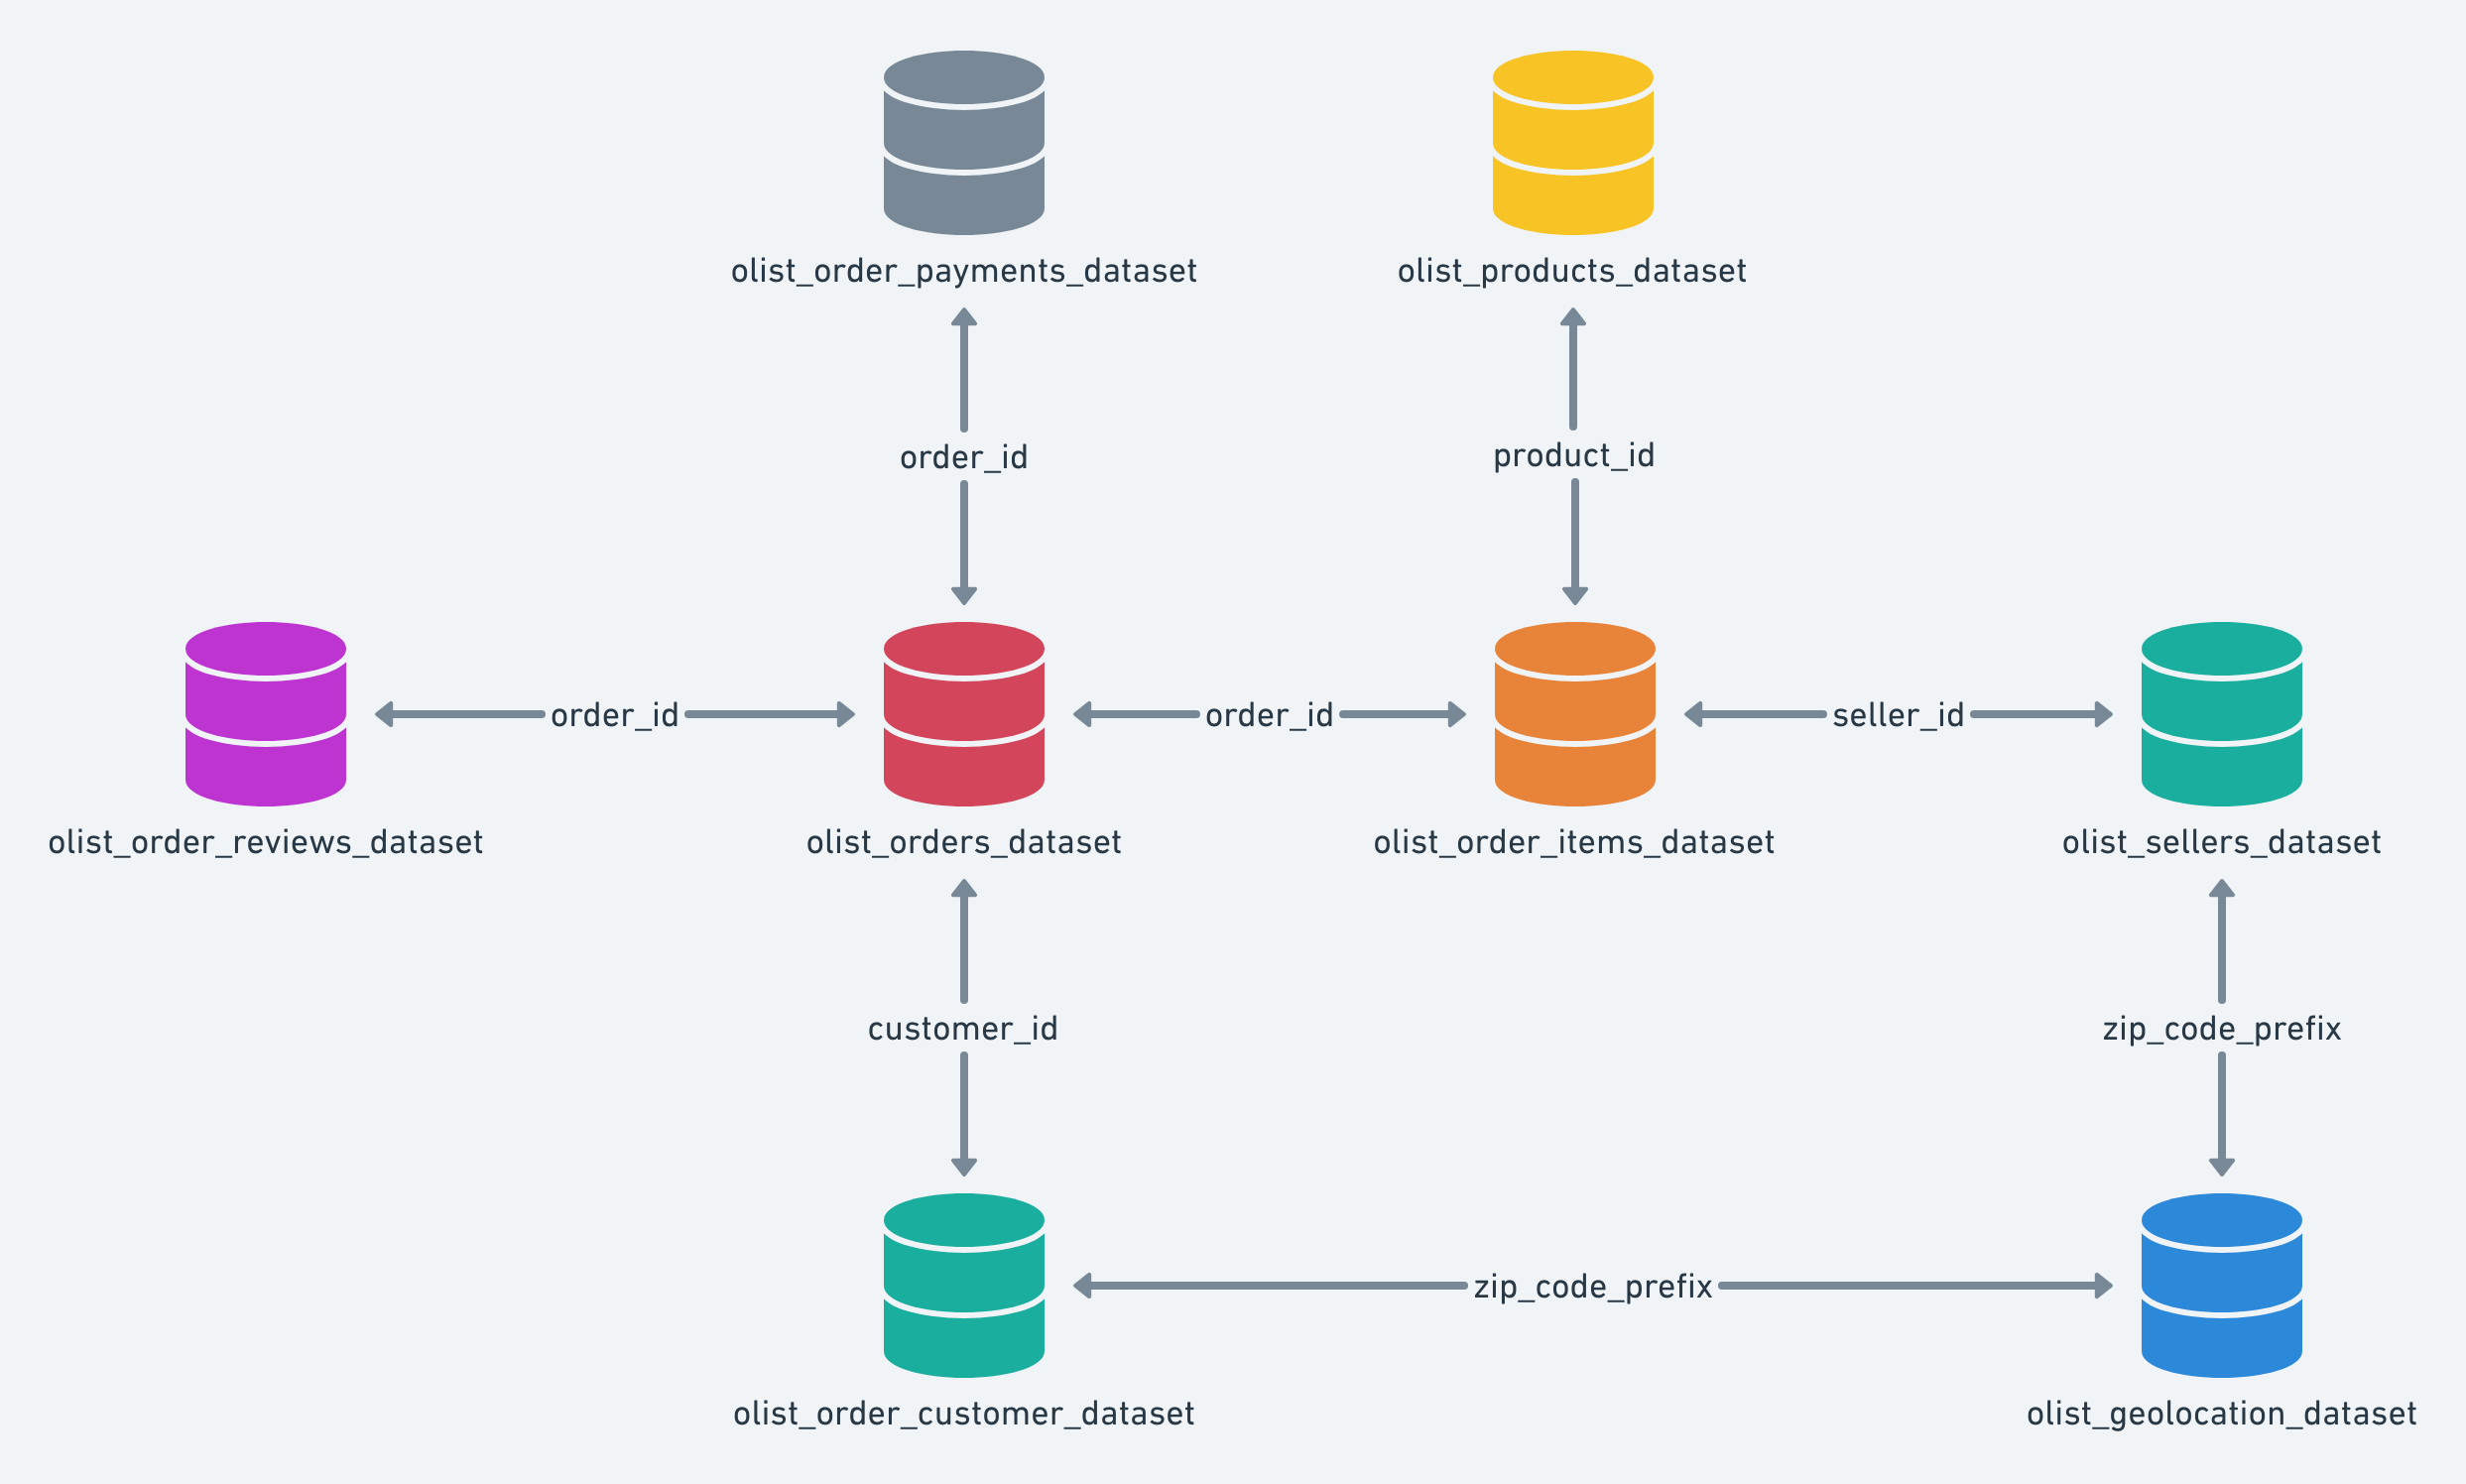}

In [3]:
category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
customers['customer_state'].value_counts()[:1]

SP    41746
Name: customer_state, dtype: int64

In [7]:
len(order_payments['payment_type'])

103886

In [8]:
(3000/len(orders))*100

3.0168642712764355

In [9]:
order_items['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

# (1) - Limpando os dados   

## 1.1 Procurando colunas com valores faltantes. 

In [10]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [12]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [15]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [17]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [18]:
category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Conclusão

- Como o banco de dados de produtos tem alguns nomes como NaN eu vou ver todos as ordens que não têm o product_category_name e se não passar de 10% do número de linhas no banco de dados de pedidos vou excluir essas linhas.


## 1.2 Filtrando todas as ordens que tem um produto. 

In [19]:
#Criando uma base de dados com todos os produtos associados as ordens 
order_ordemitems = pd.merge(order_items[['order_id','product_id']],
                            orders,
                            how='left',
                            on=['order_id','order_id'])

order_products = pd.merge(order_ordemitems,
                          products[['product_id','product_category_name']],
                          how='left',
                          on=['product_id','product_id'])

In [20]:
#Olhando o número de ordens que não tem nome dos produtos. 
len(order_products[order_products['product_category_name'].isna()]['order_id'])

1603

In [21]:
#Criando uma variável com todas as de ordens que não tem nome dos produtos.
a = order_products[order_products['product_category_name'].isna()]['order_id'].unique()

In [22]:
## Criando uma lista booleana apenas com as ordens que possui o nome do produto. O ~ é para inverter a lista booleana. 
lista = a
bollen = orders['order_id'].isin(lista)
b = ~bollen
orders_cleaned = orders[b].dropna()
#Criando uma lista com todas as ordens canceladas 

canceled = orders_cleaned[orders_cleaned['order_status'] == 'canceled']['order_id'].unique()
canceled_boolean = orders_cleaned['order_id'].isin(canceled)
orders_cleaned = orders_cleaned[~canceled_boolean]

orders = orders_cleaned

In [23]:
##Limpando order_items
bollen_2 = order_items['order_id'].isin(orders['order_id'])
b_2 = bollen_2
order_items_cleanned = order_items[b_2]
order_items = order_items_cleanned

In [24]:
##Limpando products
products = products[['product_id','product_category_name']].dropna()

In [25]:
##Limpando order_payments
bollen_payment = order_payments['order_id'].isin(orders['order_id'])
b_payment = bollen_payment
order_payments_cleanned = order_payments[b_payment]

order_payments = order_payments_cleanned

In [26]:
#Limpando customers
bollen_customers = customers['customer_id'].isin(orders['customer_id'])
b_customers = bollen_customers
customers_cleanned = customers[b_customers]

customers = customers_cleanned

In [27]:
#Limpando sellers
bollen_sellers = sellers['seller_id'].isin(order_items['seller_id'])
sellers_cleanned = sellers[bollen_sellers]

sellers = sellers_cleanned

## 1.3 Procurando por problemas em nomes ou números. 

In [28]:
order_ordemitems = pd.merge(order_items[['order_id','product_id']],orders,how='left',on=['order_id','order_id'])
order_ordemitems['order_status'].shape

(108553,)

In [29]:
(108560/112650)*100

96.36928539724812

In [30]:

customers['customer_zip_code_prefix'].value_counts()

22790    134
24230    114
24220    114
22793    114
22775    101
        ... 
3050       1
2673       1
77413      1
8568       1
99043      1
Name: customer_zip_code_prefix, Length: 14842, dtype: int64

In [31]:
customers[customers['customer_city'].str[:3] == 'sao']['customer_city'].value_counts()

sao paulo                        14799
sao bernardo do campo              894
sao jose dos campos                656
sao goncalo                        379
sao luis                           334
                                 ...  
sao goncalo do rio das pedras        1
sao felix do coribe                  1
sao bernardino                       1
sao carlos do ivai                   1
sao rafael                           1
Name: customer_city, Length: 219, dtype: int64

In [32]:
customers['customer_state'].value_counts()

SP    39927
RJ    12158
MG    11181
RS     5263
PR     4852
SC     3487
BA     3212
DF     2049
ES     1977
GO     1907
PE     1576
CE     1264
PA      929
MT      874
MA      707
MS      692
PB      509
PI      469
RN      468
AL      393
SE      333
TO      271
RO      238
AM      144
AC       78
AP       67
RR       39
Name: customer_state, dtype: int64

In [33]:
geolocation[geolocation['geolocation_city'] == 'sao paulo']['geolocation_city'].value_counts()

sao paulo    135800
Name: geolocation_city, dtype: int64

In [34]:
geolocation['geolocation_state'].value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

In [35]:
##Geolocation looks good, the city columns looks have some issues but how I don't gonna use i don't gonna clean

<AxesSubplot:xlabel='freight_value', ylabel='Count'>

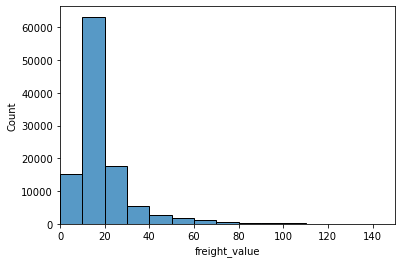

In [36]:
# Olhando o preço eo frete
plt.xlim(0, 150)
sns.histplot(order_items['freight_value'],binwidth=10)

In [37]:
#Olhando se tem preço com valor 0.
order_items[order_items_cleanned['price'] == 0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [38]:
#Olhando o nomes de categorias.
products['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [39]:
sellers[sellers['seller_city'].str[:3] == 'são']['seller_city'].value_counts()

Series([], Name: seller_city, dtype: int64)

# 2 - Analisando os dados. 

## Geral

### Total em vendas

In [40]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [41]:
## Total de vendas contando o frete

total_sales = (order_items_cleanned['price']*order_items_cleanned['order_item_id'] + order_items_cleanned['freight_value']*order_items_cleanned['order_item_id'])
total_sales.sum().round(2)

17341764.88

In [42]:
## Total de vendas sem o frete

total_sales = (order_items['price']*order_items['order_item_id'])
total_sales.sum().round(2)

14777729.02

### Total de vendedores

In [43]:
len(sellers)

2912

### Total de clientes

In [44]:

len(customers['customer_unique_id'].unique())

92021

### Total de pedidos

In [45]:
orders.shape[0]

95064

### Produtos que mais vendem

In [46]:
order_items_products = pd.merge(order_items,products,how='left',on=['product_id','product_id'])

In [47]:
order_items_products.groupby(['product_category_name'])['order_item_id'].sum().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           13459
moveis_decoracao          11293
beleza_saude              10847
esporte_lazer              9681
informatica_acessorios     9608
utilidades_domesticas      8810
relogios_presentes         6457
ferramentas_jardim         5772
telefonia                  5031
automotivo                 4769
Name: order_item_id, dtype: int64

In [48]:
a = order_items_products.groupby(['product_category_name'])['order_item_id'].sum().sort_values(ascending=False).head(10).sum()
b = order_items_products.groupby(['product_category_name'])['order_item_id'].sum().sort_values(ascending=False).sum()
(a/b)*100

65.92812483177089

### Forma de pagamento

In [49]:
order_payments['payment_type'].value_counts()

credit_card    73497
boleto         18910
voucher         5388
debit_card      1459
Name: payment_type, dtype: int64

In [50]:
a = order_payments['payment_type'].value_counts().head(2).sum()
b = order_payments['payment_type'].value_counts().sum()

(a/b)*100

93.10153746952264

### Parcelamento

In [51]:
order_payments['payment_installments'].value_counts()[:10]

1     50135
2     11852
3     10017
4      6802
10     5103
5      5025
8      4090
6      3748
7      1538
9       613
Name: payment_installments, dtype: int64

In [52]:
a = order_payments['payment_installments'].value_counts()[:4].sum()
b = order_payments['payment_installments'].value_counts().sum()

(a/b)*100

79.39831140306688

## Conclusão

- Total em vendas foi de 14777729.
- Número total de vendedores é 2912.
- Nùmero total de cliêntes é 92021.
- Os 10 itens mais vendidos corespondem a 65% de todos os itens vendidos
- 93% dos pagamentos são feitos usando cartão de credito ou boleto.
- 79% dos clientes preferem parcelar em entre 1 a 4 vezes.

# Sazonalidade

In [53]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
order_items_orders = pd.merge(order_items,
                              orders[['order_id','customer_id','order_status','order_approved_at','order_delivered_customer_date']],
                              how='left',
                              on=['order_id','order_id'])

In [55]:
order_items_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_approved_at,order_delivered_customer_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 11:05:13,2017-05-12 16:04:24
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,2018-01-22 13:19:16
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,2018-08-14 13:32:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 14:10:13,2017-03-01 16:42:31


In [56]:
#Para fazer uma análise das datas eu vou criar algumas variáveis usando datas. 
#Primeiro vou converter a coluna order_delivered_customer_date da tabela orders para tipo date

orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
#Agora vou criar outras variáveis com informações como Mês, ano, dia, nome do dia.


orders['Ano'] = orders['order_approved_at'].dt.year
orders['Mês'] = orders['order_approved_at'].dt.strftime('%b')
orders['Dia'] = orders['order_approved_at'].dt.day
orders['Semana_ano'] = orders['order_approved_at'].dt.isocalendar().week
orders['Trimestre'] = orders['order_approved_at'].dt.quarter
orders['Dias_ate_chegar'] = ( orders['order_delivered_customer_date'] -  orders['order_approved_at']).dt.days

In [57]:
#Traduzindo os nomes dos meses para português

orders['Mês'] = orders['Mês'].map({'Jan':'jan',
                                   'Feb':'fev',
                                   'Mar':'mar',
                                   'Apr':'abr',
                                   'May':'maio',
                                   'Jun':'jun',
                                   'Jul':'jul',
                                   'Aug':'ago',
                                   'Sep':'set',
                                   'Oct':'out',
                                   'Nov':'nov',
                                   'Dec':'dez',})

In [58]:
def barra_contagem(ano,dados):
    dados = dados[dados['Ano'] == ano].groupby(['Mês'])['order_id'].count().to_frame().reset_index()
    list = ['jan','fev','mar','abr','maio','jun','jul','ago','set','out','nov','dez']
    sns.catplot(x='Mês',
                y='order_id',
                kind='bar',
                aspect= 12/6,
                data=dados,
                order=list)

### Quantidade de pedidos

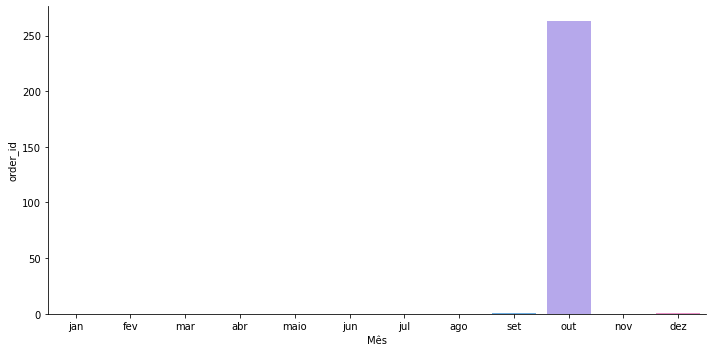

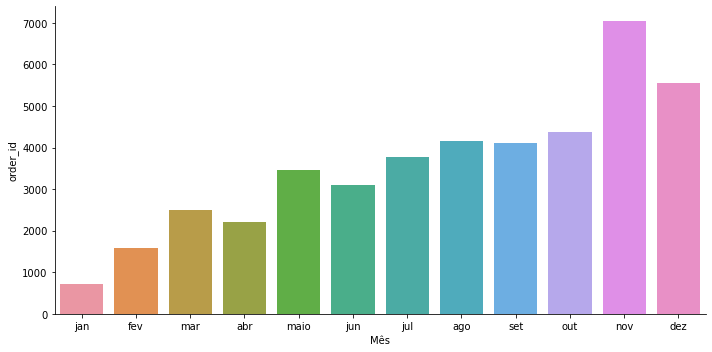

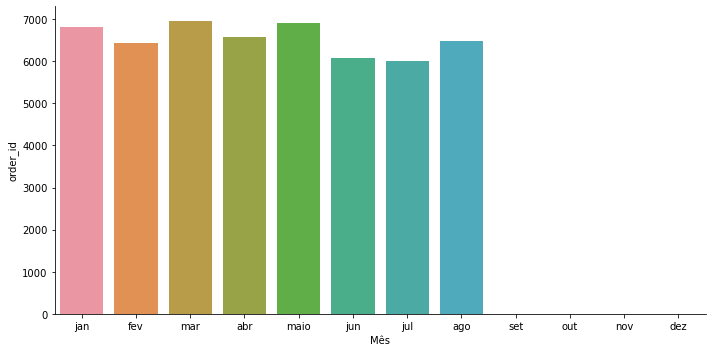

In [59]:
barra_contagem(2016,orders)
barra_contagem(2017,orders)
barra_contagem(2018,orders)

### Quantidade de itens

In [60]:
order_items_order = pd.merge(order_items,orders,how='left',on=['order_id','order_id'])
order_items_order

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Ano,Mês,Dia,Semana_ano,Trimestre,Dias_ate_chegar
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017,set,13,37,3,7
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017,abr,26,17,2,16
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018,jan,14,2,1,7
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018,ago,8,32,3,6
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017,fev,4,5,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108548,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,2018,abr,25,17,2,15
108549,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,2018,jul,17,29,3,6
108550,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,2017,out,24,43,4,3
108551,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2017,ago,15,33,3,1


In [61]:
def barra_soma(ano,dados,y):
    dados = dados[dados['Ano'] == ano].groupby(['Mês'])[y].sum().to_frame().reset_index()
    list = ['jan','fev','mar','abr','maio','jun','jul','ago','set','out','nov','dez']
    sns.catplot(x='Mês',
                y=y,
                kind='bar',
                aspect= 12/6,
                data=dados,
                order=list)

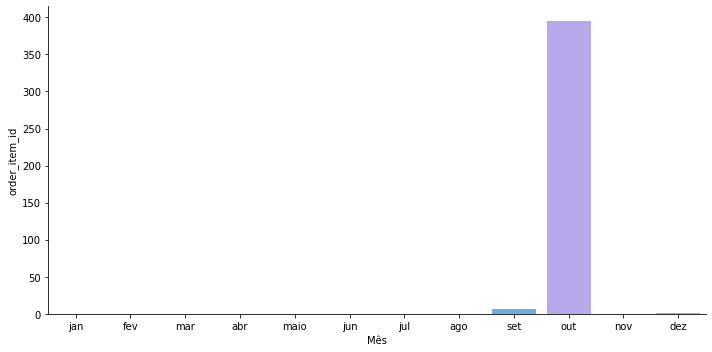

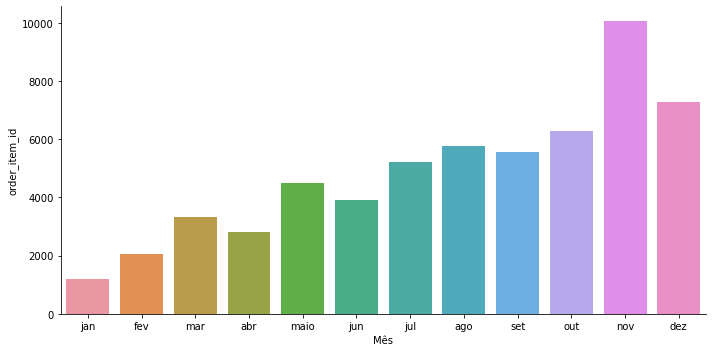

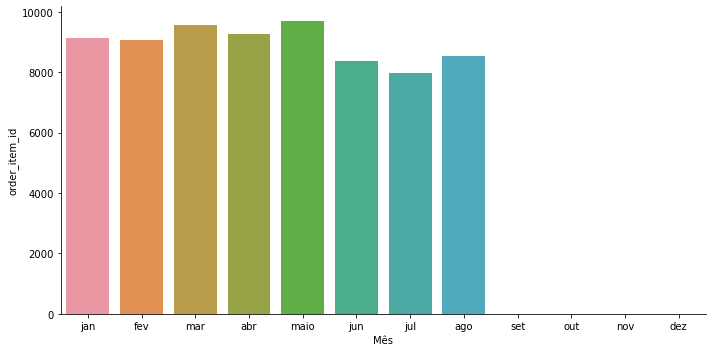

In [62]:
barra_soma(2016,order_items_order,'order_item_id')
barra_soma(2017,order_items_order,'order_item_id')
barra_soma(2018,order_items_order,'order_item_id')

### Faturamento

In [63]:
order_items['Total_venda'] = order_items['order_item_id'] * order_items['price']
order_items_order = pd.merge(order_items,orders,how='left',on=['order_id','order_id'])

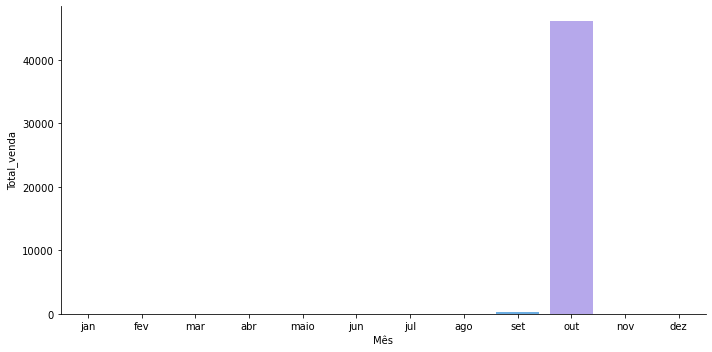

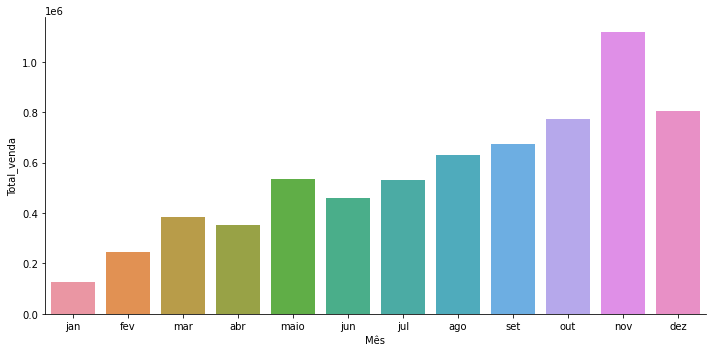

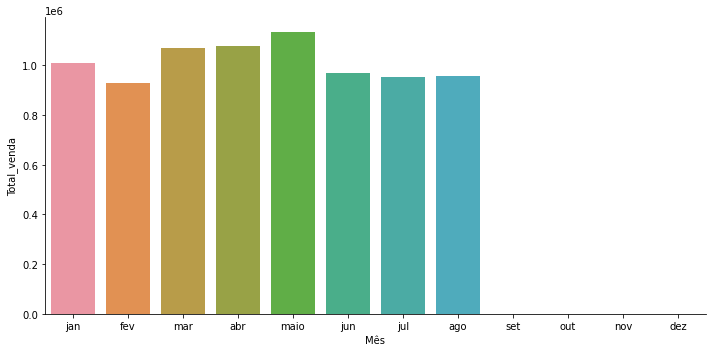

In [64]:
barra_soma(2016,order_items_order,'Total_venda')
barra_soma(2017,order_items_order,'Total_venda')
barra_soma(2018,order_items_order,'Total_venda')

### Pagamentos

In [65]:
order_payments_orders = pd.merge(order_payments,orders[['order_id','Ano','Mês']],how='left',on=['order_id','order_id'])

In [66]:
order_payments_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,Ano,Mês
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,2018,abr
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,2018,jun
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,2017,dez
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,2017,dez
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,2018,maio


In [67]:

def barra_contagem_pagamento(hue,ano,dados,paleta):
    #dados = dados[dados['Ano'] == ano].groupby(['Mês'])['order_id'].count().to_frame().reset_index()
    list = ['jan','fev','mar','abr','maio','jun','jul','ago','set','out','nov','dez']
    sns.catplot(x='Mês',
                hue=hue,
                kind='count',
                aspect= 12/6,
                data=dados[dados['Ano'] == ano],
                palette=paleta,
                order=list)

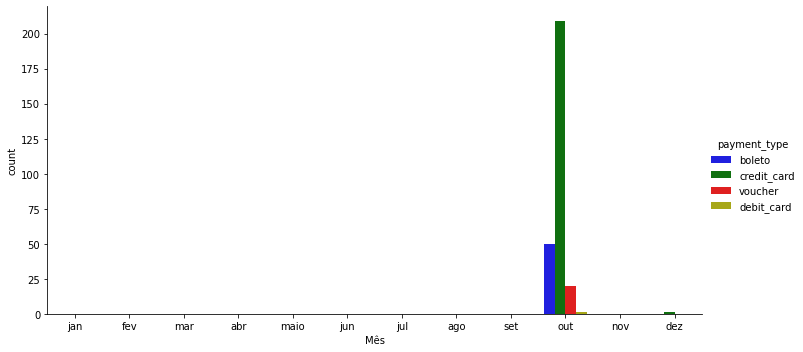

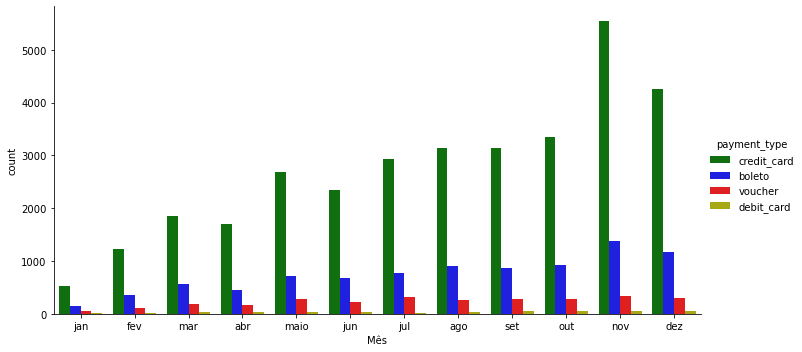

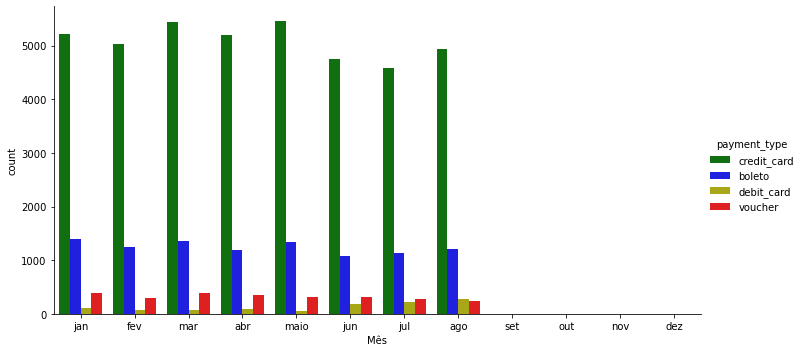

In [68]:
paleta = {'boleto':'b','credit_card':'g','voucher':'r','debit_card':'y'}

barra_contagem_pagamento('payment_type',2016,order_payments_orders,paleta=paleta)
barra_contagem_pagamento('payment_type',2017,order_payments_orders,paleta=paleta)
barra_contagem_pagamento('payment_type',2018,order_payments_orders,paleta=paleta)

### Conclusão

**Quantidade de pedidos**  

- Pouca quantidade no ano de 2016 

- Uma grande crescente no ano de 2017 chegando a 7000 pedidos 

- 2018 teve uma estabilidade entre os valores 6000 e 8000 até o mês de agosto 

  

**Quantidade de itens vendidos** 

- Ele tem o mesmo comportamento de pedidos mudando apenas os valores. 

- Em 2017 chegou a marca de 10000 em dezembro 

- Em 2018 teve uma estabilidade entre 8000 e 1000 até agosto. 

  

**Pagamentos** 

- Em todos os anos se mantem um padrão de maior parte dos pagamentos é em cartão de credito e boleto. 

**Faturamento**  

- Pouca quantidade no ano de 2016 

- Uma grande crescente no ano de 2017 chegando a maxima de mais de 1.000.000 reais em novembro 

- 2018 teve uma estabilidade de valores proximos ao valor de novembro de 2017 em todos os meses ate agosto.


## Vendedores

### Estados que mais vendem (monetário)

In [69]:
# Criando uma variável com o total da venda (sem contar o frete) 
order_items['Total_venda'] = order_items['order_item_id'] * order_items['price']

In [70]:
order_items_seller = pd.merge(order_items,sellers,how='left',on=['seller_id','seller_id'])

In [71]:
order_items_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Total_venda,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,87900,loanda,PR


In [72]:
#Olhando os estados que mais vendem
a = order_items_seller.groupby(['seller_state'])['Total_venda'].sum().sort_values(ascending=False)[:5].sum()
b = order_items_seller.groupby(['seller_state'])['Total_venda'].sum().sort_values(ascending=False).sum() 

(a/b)*100

92.02672001628028

In [73]:
order_items_seller.groupby(['seller_state'])['Total_venda'].sum().sort_values(ascending=False).sum()

14777729.019999998

In [74]:
order_items['Total_venda'].sum()

14777729.020000001

In [75]:
order_items_seller.groupby(['seller_state'])['Total_venda'].sum().sort_values(ascending=False)[:5]

seller_state
SP    9600187.35
PR    1371548.83
MG    1088473.70
RJ     873970.89
SC     665278.54
Name: Total_venda, dtype: float64

### Estados que mais vendem (itens)

In [76]:
#Olhando os estados que mais vendem
a = order_items_seller.groupby(['seller_state'])['order_item_id'].sum().sort_values(ascending=False)[:5].sum()
b = order_items_seller.groupby(['seller_state'])['order_item_id'].sum().sort_values(ascending=False).sum() 

(a/b)*100

94.91736585891056

In [77]:
order_items_seller.groupby(['seller_state'])['order_item_id'].sum().sort_values(ascending=False)[:5]

seller_state
SP    93610
PR     9959
MG     9711
RJ     5399
SC     4743
Name: order_item_id, dtype: int64

### Conclusão

- Os estados SP,PR,MG,RJ,SC são os que mais vendem. Somando 92% do valor de todas as vendas.
- Os estados SP,PR,MG,RJ,SC são os que mais vendem em quantidade de itens. Somando 94% dos itens de todas as vendas.

## Compradores

### Estados que mais gastam (monetário) 

In [78]:
#Criando a base de dados para a análise
orders_costumers = pd.merge(orders[['order_id','customer_id','Dias_ate_chegar']],
                            customers[['customer_id','customer_city','customer_state']],
                            how='left',
                            on=['customer_id','customer_id'])

order_items_costumers = pd.merge(order_items,
                                 orders_costumers[['order_id','Dias_ate_chegar','customer_city','customer_state']],
                                 how='left',
                                 on=['order_id','order_id'])

In [79]:
order_items_costumers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Total_venda,Dias_ate_chegar,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,7,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,16,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,7,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,6,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,25,varzea paulista,SP


In [80]:
order_items_costumers.groupby(['customer_state'])['Total_venda'].sum().sort_values(ascending=False)[:5]

customer_state
SP    5671453.09
RJ    1996610.27
MG    1719020.89
RS     810894.85
PR     754971.03
Name: Total_venda, dtype: float64

In [81]:
a = order_items_costumers.groupby(['customer_state'])['Total_venda'].sum().sort_values(ascending=False)[:5].sum()
b = order_items_costumers.groupby(['customer_state'])['Total_venda'].sum().sort_values(ascending=False).sum()

(a/b)*100

74.11795219127654

### Média no valor do frete

In [82]:
order_items_costumers.groupby('customer_state')['freight_value'].mean().sort_values(ascending=True)

customer_state
SP    15.139287
PR    20.519192
MG    20.672401
RJ    20.956439
DF    21.137541
SC    21.568455
RS    21.641267
ES    22.091020
GO    22.642783
MS    23.438317
BA    26.479092
MT    28.121122
PE    32.746065
CE    32.806705
AM    33.122795
AP    34.160494
PA    35.513359
RN    35.777515
AL    35.936903
SE    36.637131
TO    37.622876
MA    38.586599
PI    39.132112
AC    40.268764
RO    41.376929
PB    43.198059
RR    43.777500
Name: freight_value, dtype: float64

### Média dos dias de espera

In [83]:
order_items_costumers.groupby('customer_state')['Dias_ate_chegar'].mean().sort_values(ascending=True)

customer_state
SP     7.818031
PR    10.979526
MG    11.065530
DF    12.043497
SC    13.992808
RS    14.180325
GO    14.266547
RJ    14.281742
MS    14.627182
ES    14.701587
TO    16.431373
MT    16.879024
PE    17.340685
BA    18.277747
PI    18.449612
RN    18.467961
RO    18.880150
PB    19.561525
AC    19.662921
CE    19.938920
SE    20.584450
MA    20.639594
PA    22.780888
AL    23.434988
AM    25.478261
AP    27.000000
RR    27.431818
Name: Dias_ate_chegar, dtype: float64

### Conclusão
- Os estados SP, RJ, MG, RS,PR são os que mais comprão. Somando 74% do valor total das compras 

- Os estados que mais comprão são também aqueles q em média pagam menores valores de frete e tem menor tempo de espera sendo SP menor de todos. 

## Análise de fluxo

In [84]:
costumers_sellers = pd.merge(order_items_costumers,
                            sellers[['seller_id','seller_city','seller_state']],
                            how='left',
                            on=['seller_id','seller_id'])

In [85]:
costumers_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Total_venda,Dias_ate_chegar,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,7,campos dos goytacazes,RJ,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,16,santa fe do sul,SP,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,7,para de minas,MG,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,6,atibaia,SP,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,25,varzea paulista,SP,loanda,PR


In [86]:
costumers_sellers['fluxo'] = costumers_sellers['seller_state'] + '-' + costumers_sellers['customer_state']

In [87]:
a = costumers_sellers.groupby(['fluxo'])['order_item_id'].sum().sort_values(ascending=False)[:1].sum()
b = costumers_sellers.groupby(['fluxo'])['order_item_id'].sum().sort_values(ascending=False).sum()

(a/b)*100

32.75603509932247

In [88]:
costumers_sellers.groupby(['fluxo'])['order_item_id'].sum().sort_values(ascending=False)[:10]

fluxo
SP-SP    42593
SP-RJ    11119
SP-MG    10147
SP-RS     4855
SP-PR     4386
PR-SP     3965
MG-SP     3321
SP-SC     3301
SP-BA     3041
SP-GO     2176
Name: order_item_id, dtype: int64

### Conclusão

-Um terço dos itens pedidos são de São Paulo para São Paulo.

## Criando perfil do Cliênte

In [89]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,Total_venda
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90


In [90]:
def perfil(estado):
    dados = pd.merge(customers,orders[['order_id','customer_id','Dias_ate_chegar']],how='left',on=['customer_id','customer_id'])
    dados = pd.merge(order_items,dados[['order_id','Dias_ate_chegar','customer_state']],how='left',on=['order_id','order_id'])
    dados = pd.merge(dados,products,how='left',on=['product_id','product_id'])
    
    print('Itens mais comprados')
    print(dados[dados['customer_state'] == estado].groupby(['product_category_name'])['order_item_id'].sum().sort_values(ascending=False).head(6))
    print('\n')
    
    print('Média no valor do frete')
    print(dados[dados['customer_state'] == estado]['freight_value'].mean())
    print('\n')
    
    print('Média de dias de espera')
    print(dados[dados['customer_state'] == estado]['Dias_ate_chegar'].mean())
    print('\n')
    
    

In [91]:
perfil('SP')

Itens mais comprados
product_category_name
cama_mesa_banho           6395
beleza_saude              4915
moveis_decoracao          4800
informatica_acessorios    4093
esporte_lazer             4057
utilidades_domesticas     3994
Name: order_item_id, dtype: int64


Média no valor do frete
15.139287415077055


Média de dias de espera
7.8180308888743255




In [92]:
perfil('RJ')

Itens mais comprados
product_category_name
cama_mesa_banho           1969
moveis_decoracao          1408
esporte_lazer             1203
informatica_acessorios    1191
beleza_saude              1165
utilidades_domesticas     1073
Name: order_item_id, dtype: int64


Média no valor do frete
20.956438887691444


Média de dias de espera
14.281741754688511




In [93]:
perfil('MG')

Itens mais comprados
product_category_name
cama_mesa_banho           1612
moveis_decoracao          1305
beleza_saude              1173
informatica_acessorios    1158
utilidades_domesticas     1119
esporte_lazer             1083
Name: order_item_id, dtype: int64


Média no valor do frete
20.672401194311792


Média de dias de espera
11.065529975642335




In [94]:
perfil('RS')

Itens mais comprados
product_category_name
moveis_decoracao          742
cama_mesa_banho           727
informatica_acessorios    616
utilidades_domesticas     606
esporte_lazer             535
beleza_saude              488
Name: order_item_id, dtype: int64


Média no valor do frete
21.641267418712907


Média de dias de espera
14.180325149303252




In [95]:
perfil('PR')

Itens mais comprados
product_category_name
moveis_decoracao          798
cama_mesa_banho           563
esporte_lazer             554
beleza_saude              472
informatica_acessorios    459
utilidades_domesticas     427
Name: order_item_id, dtype: int64


Média no valor do frete
20.51919181034503


Média de dias de espera
10.979525862068966




### Conclusão
- Entre os estados que mais compram não há uma grande variação nos tipos de itens vendidos. Oque mais varia é a média no valor do frete e na espera sendo uma variação de 6 reais no valor do frete e 13 dias no tempo de espera. 

## 3 Convertendo a base de dados para csv. 

In [96]:
orders.to_csv('../3_aula/orders.csv',index=False)

In [97]:
order_items.to_csv('../3_aula/orders_items.csv',index=False)

In [98]:
products.to_csv('../3_aula/products.csv',index=False)

In [99]:
customers.to_csv('../3_aula/customers.csv',index=False)

In [100]:
sellers.to_csv('../3_aula/sellers.csv',index=False)

In [101]:
order_payments.to_csv('../3_aula/order_payments.csv',index=False)